In [30]:
from data import Data
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [31]:
class LSTM_model(nn.Module): 
    def __init__(self, num_inputs, num_hiddens,num_out=1):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.LSTM = nn.LSTM(num_inputs, num_hiddens, bias=False)
        self.linear = nn.Linear(num_hiddens, num_out, bias=False)
    def forward(self, X, H, c):
        X_0 = torch.zeros(len(X),1)
        X_0[0] = 1.
        out, (H, c) = self.LSTM(X_0,(H,c))
        pred = self.linear(out)
        return pred, H

In [32]:
def train(model, X, optimizer, criterion, H, c, epoch):
    model.train()
    optimizer.zero_grad()
    y_hat, H = model(X, H, c)
    loss = criterion(X,y_hat)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(torch.sqrt(loss.detach()))

In [37]:
data = Data(0.1,100,0.)
X = data.x.reshape(len(data.x),1)
mse_loss = nn.MSELoss()
lstm_model = LSTM_model(1,2) #hidden state of size 2 is enough for sin
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.1)
for epoch in range(5001):
    H = torch.zeros(1,2)
    c = torch.zeros(1,2)
    train(lstm_model, X, optimizer, mse_loss, H, c,epoch)

tensor(0.6894)
tensor(0.5663)
tensor(0.5760)
tensor(0.0182)
tensor(0.0211)
tensor(0.0144)


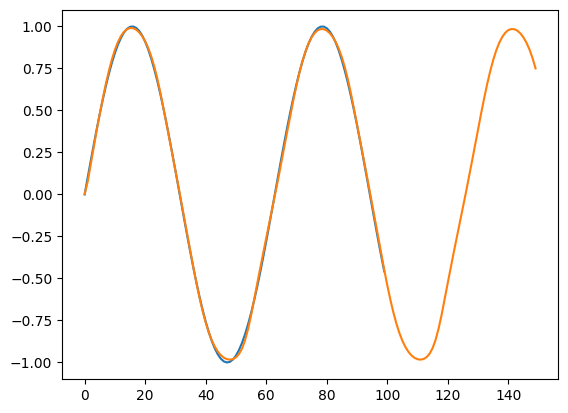

In [38]:
X_pred = torch.zeros(150).unsqueeze(-1)
X_predicted,H_out = lstm_model(X_pred,H,c)
plt.plot(X)
plt.plot(X_predicted.detach())